## Explore the titanic training set

In [2]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [3]:
train = pd.read_csv('./data/train.csv')

In [4]:
print('Training set ( Rows , Columns ) : ', train.shape)

Training set ( Rows , Columns ) :  (891, 12)


In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Missing values

* Age
* Cabin
* Embarked

In [7]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [8]:
most_freq_port = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_freq_port, inplace = True)

### Describe numeric

In [9]:
train_describe_numeric = train.describe()
train_describe_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print('So survival rate is ')
print(train_describe_numeric.loc['mean', 'Survived'])

So survival rate is 
0.3838383838383838


In [11]:
train_describe_categorical = train.describe(include=['O'])
train_describe_categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Abbott, Mrs. Stanton (Rosa Hunt)",male,1601,G6,S
freq,1,577,7,4,646


In [12]:
print('Most of the people on the ship were : ')
print('Sex : ', train_describe_categorical.loc['top', 'Sex'])
print('count : ', train_describe_categorical.loc['freq', 'Sex'])

Most of the people on the ship were : 
Sex :  male
count :  577


---

### Drop unnecessary features

In [13]:
columns_to_drop = ['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train.drop(
    columns_to_drop, 
    axis = 1, 
    inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


### Create new features

### Create *Family_Size* feature

In [14]:
train["Family_Size"] = train['SibSp'] + train['Parch'] + 1
train["Family_Size"].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Size, dtype: int64

### Create *Family_Type* feature

In [15]:
no_of_bins = 5
train['Family_Type'] = pd.cut(train['Family_Size'], no_of_bins, labels = np.arange(no_of_bins))
train['Family_Type'].head()

0    0
1    0
2    0
3    0
4    0
Name: Family_Type, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

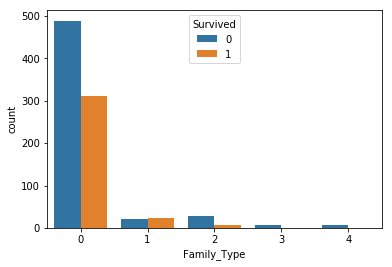

In [16]:
sns.countplot(x = "Family_Type", hue = "Survived", data = train)

### Create *Age_Group* category

In [17]:
no_of_bins = 5
train['Age_Group'] = pd.cut(train['Age'], no_of_bins, labels = np.arange(no_of_bins))
train[ 'Age_Group' ].head()

0    1
1    2
2    1
3    2
4    2
Name: Age_Group, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

### Encode *gender*  feature

In [18]:
train[ 'Sex' ] = labelencoder.fit_transform(train[ 'Sex' ])
train[ 'Sex' ].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

----

### Visualize training set

### Survival rate by Age_Group

In [26]:
survival_rate_by_age_group = train[['Age_Group', 'Survived']].groupby(['Age_Group'], as_index = False).mean()
survival_rate_by_age_group = survival_rate_by_age_group.sort_values(by = 'Survived', ascending = False)
survival_rate_by_age_group

,Age_Group,Survived
0,0,0.550000
3,3,0.434783
2,2,0.404255
1,1,0.344168
4,4,0.090909


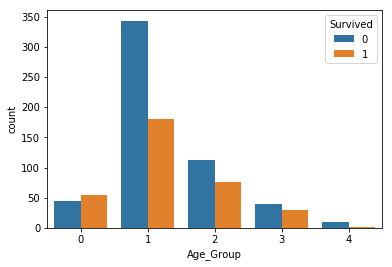

In [20]:
sns.countplot(x = "Age_Group", hue = "Survived", data = train)

### Survival rate by class

In [21]:
survival_rate_by_class = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()
survival_rate_by_class = survival_rate_by_class.sort_values(by = 'Survived', ascending = False)
survival_rate_by_class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


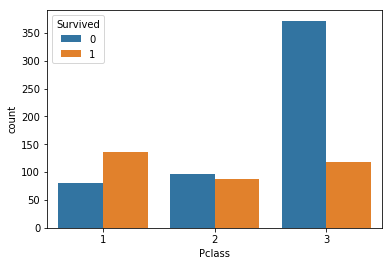

In [22]:
sns.countplot(x = "Pclass", hue = "Survived", data = train)

### Survival rate by gender 

In [23]:
survival_rate_by_gender = train[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean()
survival_rate_by_gender = survival_rate_by_gender.sort_values(by = 'Survived', ascending = False)
survival_rate_by_gender

,Sex,Survived
0,0,0.742038
1,1,0.188908


Women were much more likely to survive

### Survival rate by family size 

In [24]:
survival_rate_by_family_size = train[["Family_Size", "Survived"]].groupby(['Family_Size'], as_index = False).mean()
survival_rate_by_family_size = survival_rate_by_family_size.sort_values(by = 'Survived', ascending = False)
survival_rate_by_family_size

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


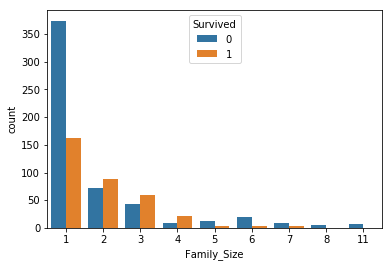

In [25]:
sns.countplot(x = "Family_Size", hue = "Survived", data = train)